 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [135]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [136]:
# Reading whale returns
whale_returns_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [137]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [138]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [139]:
# Reading algorithmic returns
algorithmic_returns_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algorithmic_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [140]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [141]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [142]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [143]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [144]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [145]:
# Calculate Daily Returns
daily_returns_sp = sp500_df.pct_change()
daily_returns_sp

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [146]:
# Drop nulls
daily_returns_sp = daily_returns_sp.dropna().copy()
daily_returns_sp.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [147]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp = daily_returns_sp.rename(columns={'Close':'SP 500'}).copy()
daily_returns_sp

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [148]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_df, algo_df, daily_returns_sp], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

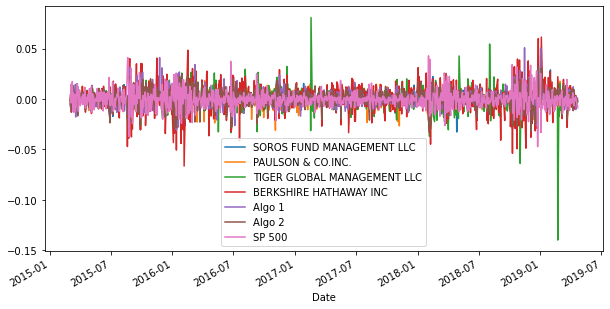

In [149]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

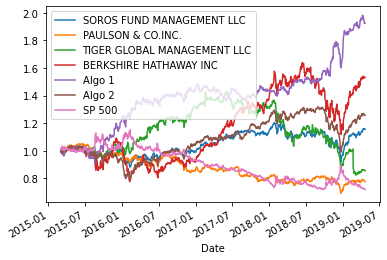

In [150]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1 + joined_returns).cumprod()
# Plot cumulative returns
cumulative_returns_all.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

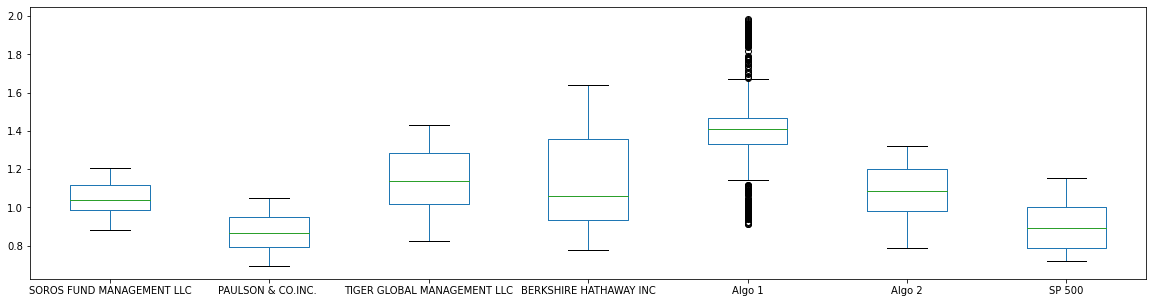

In [151]:
# Box plot to visually show risk
cumulative_returns_all.plot(kind='box', figsize=(20,5))

### Calculate Standard Deviations

In [152]:
# Calculate the daily standard deviations of all portfolios
std_all = joined_returns.std()
std_all

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP 500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [153]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = std_all['SP 500']
print(std_sp500)
# Determine which portfolios are riskier than the S&P 500
def more_less_risk(df):
    for portfolios in df:
        std_all.drop(columns=["SP 500"])
        if portfolios > std_sp500:
            print("More Risk")
        elif portfolios == std_sp500:
            print('')
        else:
            print("Less Risk")
        
more_less_risk(std_all) 

0.00858688974707399
Less Risk
Less Risk
More Risk
More Risk
Less Risk
Less Risk



### Calculate the Annualized Standard Deviation

In [154]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_all * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP 500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

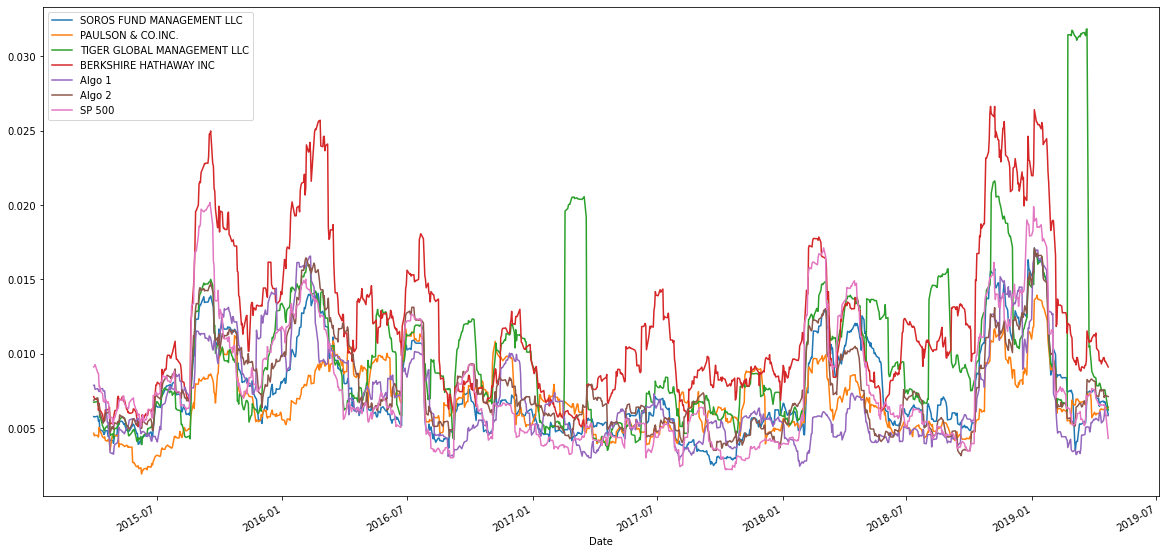

In [155]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_returns.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation



### Calculate and plot the correlation

In [156]:
# Calculate the correlation
portfolio_correlation = joined_returns.corr()
# Display de correlation matrix
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: SP 500, Length: 1042, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.213991
2019-04-16    0.150997
2019-04-17    0.144171
2019-04-18    0.144017
2019-04-22    0.185516
Length: 1042, dtype: float64


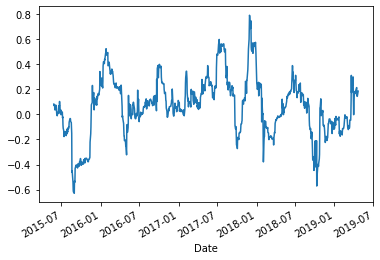

In [157]:
# Calculate covariance of a single portfolio
berkshire_cov = joined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_returns['SP 500'])
# Calculate variance of S&P 500
sp_var = joined_returns['SP 500'].rolling(window=60).var()
print(sp_var)
# Computing beta
berk_beta = joined_returns['berk_beta'] = berkshire_cov/sp_var
print(berk_beta)
# Plot beta trend
joined_returns['berk_beta'].plot()
joined_returns = joined_returns.drop(columns=['berk_beta']).copy()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [158]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [160]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

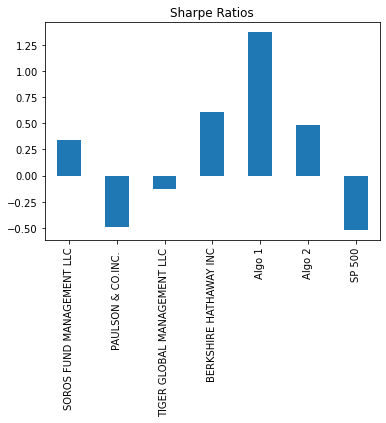

In [161]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic strategies outperformed the market, and was either on par with or greatly above the berkshire strategies.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [162]:
# Reading data from 1st stock
goog_csv = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df['NOCP'] = goog_df['NOCP'].pct_change()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,NaN
2019-05-08,GOOG,0.003347
2019-05-07,GOOG,0.006714
2019-05-06,GOOG,0.013023
2019-05-03,GOOG,-0.003355


In [163]:
# Reading data from 2nd stock
appl_csv = Path("../Starter_Code/Resources/whale_returns.csv")
appl_df = pd.read_csv(appl_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
appl_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [164]:
# Reading data from 3rd stock
cost_csv = Path("../Starter_Code/Resources/whale_returns.csv")
cost_df = pd.read_csv(cost_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [165]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_df, appl_df], axis='columns', join='inner')
columns = ["symbol", "nocp", "sfm", "pc", "tgm", "bh"]
combined_stocks.columns = columns


In [166]:
# Reset Date index


In [167]:
# Reorganize portfolio data by having a column per symbol


In [168]:
# Calculate daily returns


# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [169]:
# Set weights
weights = [1/3, 1/3, 1/3]
nocp = 1/3*combined_stocks['nocp']; sfm = 1/3*combined_stocks['sfm']; pc = 1/3*combined_stocks['pc']; tgm = 1/3*combined_stocks['tgm']; bh = 1/3*combined_stocks['bh']
# Calculate portfolio return
weighted_returns = nocp + sfm + pc + tgm + bh
weighted_returns.head()
# Display sample data


2019-05-01   -0.006084
2019-04-30    0.003332
2019-04-29    0.032944
2019-04-26    0.009380
2019-04-25   -0.002914
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [170]:
# Join your returns DataFrame to the original returns DataFrame
combined_stocks['weighted_returns'] = weighted_returns
combined_stocks.head()

,symbol,nocp,sfm,pc,tgm,bh,weighted_returns
2019-05-01,GOOG,0.004705,-0.005847,-0.001341,-0.007936,-0.007833,-0.006084
2019-04-30,GOOG,0.017465,-0.001295,-0.002211,-0.000259,-0.003702,0.003332
2019-04-29,GOOG,0.083384,0.001254,0.002719,0.006251,0.005223,0.032944
2019-04-26,GOOG,-0.011960,0.008149,0.009162,0.012355,0.010434,0.009380
2019-04-25,GOOG,-0.006862,-0.000285,-0.001291,-0.005153,0.004848,-0.002914


In [171]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stocks.isnull().sum()

symbol              0
nocp                0
sfm                 0
pc                  0
tgm                 0
bh                  0
weighted_returns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [172]:
# Calculate the annualized `std`
combined_std = combined_stocks['weighted_returns'].std()
annualized_portfolio = combined_std * np.sqrt(252)

annualized_portfolio

0.22563008528731526

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

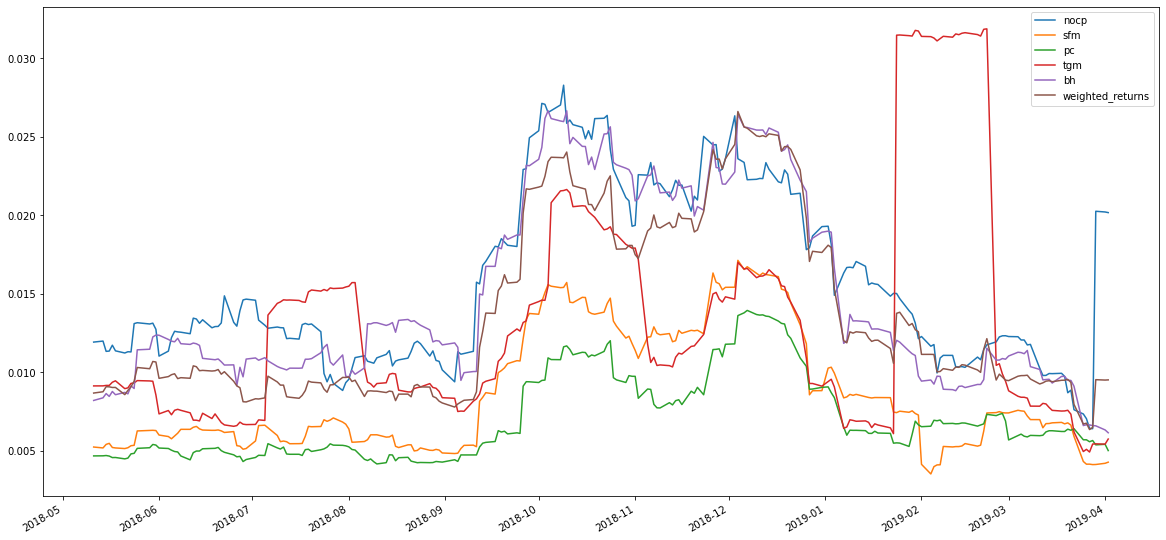

In [173]:
# Calculate rolling standard deviation
combined_stocks.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

In [174]:
# Calculate and plot the correlation
combined_corr = combined_stocks.corr()
combined_corr.head()

,nocp,sfm,pc,tgm,bh,weighted_returns
nocp,1.000000,0.095959,0.070998,0.036550,0.062577,0.461905
sfm,0.095959,1.000000,0.791582,0.479691,0.816221,0.844490
pc,0.070998,0.791582,1.000000,0.487989,0.650657,0.768645
tgm,0.036550,0.479691,0.487989,1.000000,0.327519,0.658195
bh,0.062577,0.816221,0.650657,0.327519,1.000000,0.782533


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

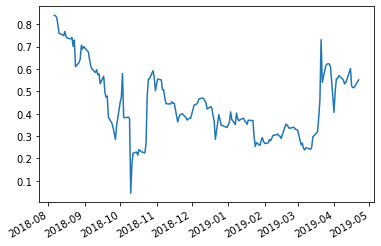

In [175]:
# Calculate and plot Beta
portfolio_covariance = combined_stocks['weighted_returns'].rolling(window=60).cov(joined_returns['SP 500'])
portfolio_beta = portfolio_covariance/sp_var
portfolio_beta = portfolio_beta.dropna().copy()
portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [176]:
# Calculate Annualzied Sharpe Ratios
joined_returns['weighted_portfolio'] = combined_stocks['weighted_returns']


sharpe_ratios = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

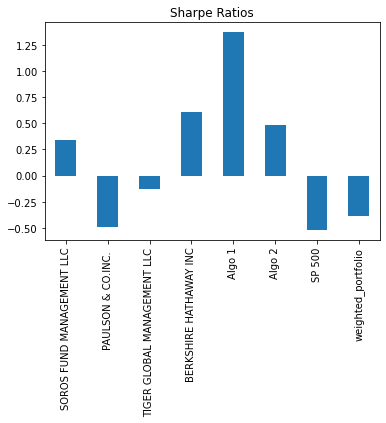

In [177]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My portfolio was very similar to the sp500, so not very well.